# Part 1: Denoising

In [341]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
import matplotlib.cm as cm
import math

In [342]:
img1 = cv2.imread('14.jpg',0) 

In [343]:
img2 = cv2.imread('24.jpg',0)

Text(0.5, 1.0, 'Original image2')

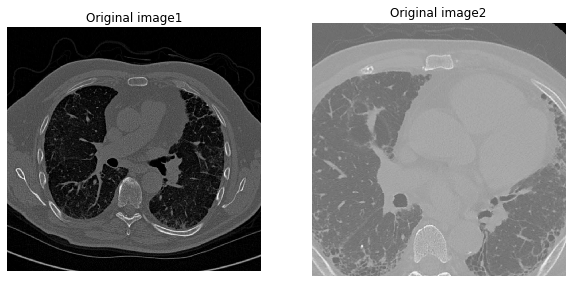

In [344]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(img1,cmap = cm.gray)
plt.axis('off')
plt.title("Original image1")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(img2,cmap = cm.gray)
plt.axis('off')
plt.title("Original image2")

In [345]:
# Generate Gaussian noise
def Gaussian_Noise(img,var):
    gauss = np.random.normal(0,var,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1]).astype('uint8')
    # Add the Gaussian noise to the image
    img_gauss = cv2.add(img,gauss)
    return img_gauss

Noisy PSNR: 361.20199909921956


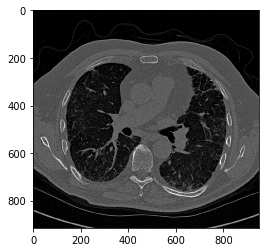

In [346]:
#****img1 Gaussian Noise and PSNR value**********
img_noisy1 = Gaussian_Noise(img1,0.005)
Noisy_PSNR = cv2.PSNR(img1,img_noisy1)
print('Noisy PSNR:',Noisy_PSNR)
plt.imshow(img_noisy1,cmap = cm.gray)

Noisy PSNR: 361.20199909921956


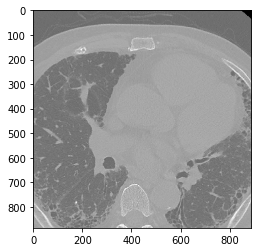

In [347]:
#****img2 Gaussian Noise and PSNR value**********
img_noisy2 = Gaussian_Noise(img2,0.005)
Noisy_PSNR = cv2.PSNR(img2,img_noisy2)
print('Noisy PSNR:',Noisy_PSNR)
plt.imshow(img_noisy2,cmap = cm.gray)

Denoise PSNR: 40.51024633227401


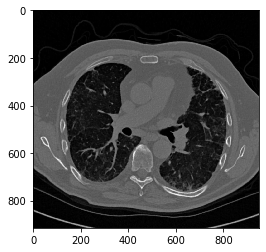

In [348]:
#*******Removing the Gaussian Noise from image1**********
#Median FIlter 
img_filter1 = cv2.medianBlur(img_noisy1,5)
Denoise_PSNR = cv2.PSNR(img1,img_filter1)
print('Denoise PSNR:',Denoise_PSNR)
plt.imshow(img_filter1,cmap = cm.gray)

Denoise PSNR: 44.97347841408917


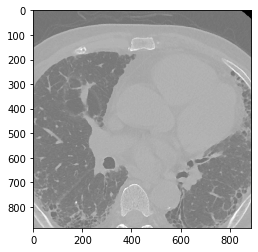

In [349]:
#*******Removing the Gaussian Noise from image2**********
#Median FIlter 
img_filter2 = cv2.medianBlur(img_noisy2,5)
Denoise_PSNR = cv2.PSNR(img2,img_filter2)
print('Denoise PSNR:',Denoise_PSNR)
plt.imshow(img_filter2,cmap = cm.gray)

In [350]:
def salt_pepper(img):
    row = img.shape[0]
    col = img.shape[1]
    #img_sp = np.zeros((row,col))
    #for i in range(row):
       # for j in range(col):
           # img_sp[i][j] = img[i][j]
            
    number_of_pixels = random.randint(300,10000)
    for i in range(number_of_pixels):
        y = random.randint(0, row-1)
        x = random.randint(0,col-1)
        img[y][x] = 255
        
    number_of_pixels = random.randint(300,10000)
    for i in range(number_of_pixels):
        y = random.randint(0, row-1)
        x = random.randint(0,col-1)
        img[y][x] = 0
    return img

In [351]:
img_spnoise1 = salt_pepper(img1)
img_spnoise2 = salt_pepper(img2)
Noisy_PSNR1 = cv2.PSNR(img1,img_spnoise1)
Noisy_PSNR2 = cv2.PSNR(img2,img_spnoise2)
print('Noisy PSNR1:',Noisy_PSNR1)
print('Noisy PSNR2:',Noisy_PSNR2)

Noisy PSNR1: 361.20199909921956
Noisy PSNR2: 361.20199909921956


Text(0.5, 1.0, 'Noisy image2')

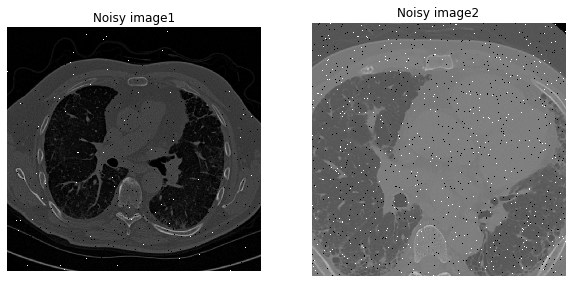

In [352]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(img_spnoise1,cmap = cm.gray)
plt.axis('off')
plt.title("Noisy image1")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(img_spnoise2,cmap = cm.gray)
plt.axis('off')
plt.title("Noisy image2")

In [353]:
# Removing the Noise by mean filter

In [354]:
img_filt_mean1 = cv2.blur(img_spnoise1,(5,5))
img_filt_mean2 = cv2.blur(img_spnoise2,(5,5))
PSNR_Denoised1 = cv2.PSNR(img1,img_filt_mean1)
PSNR_Denoised2 = cv2.PSNR(img2,img_filt_mean2)
print('PSNR Denoised1:',PSNR_Denoised1)
print('PSNR Denoised1:',PSNR_Denoised2)

PSNR Denoised1: 29.38761445745673
PSNR Denoised1: 24.12711548466264


Text(0.5, 1.0, 'filtered image2')

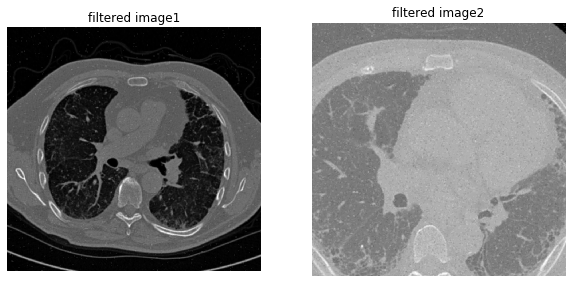

In [355]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(img_filt_mean1,cmap = cm.gray)
plt.axis('off')
plt.title("filtered image1")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(img_filt_mean2,cmap = cm.gray)
plt.axis('off')
plt.title("filtered image2")

# Part 2: Contrast enhancement and edge detection
#i. Enhance the contrast of the images. Visualize the input and the contrast enhanced image using histograms.
#ii. After contrast enhancement, try to detect the edges of the sternum (crop the image such that it encompasses #atleast twice the size of the sternum) using various edge detectors and compare the performance of the edge #detectors.

In [356]:
hist = cv2.calcHist([img_filter1],[0],None,[256],[0,255])

(0, 256)

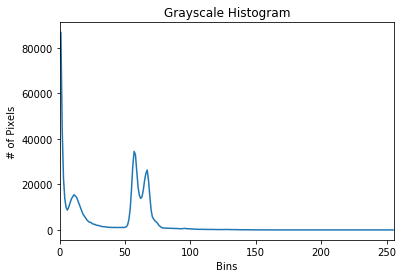

In [357]:
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

In [358]:
# normalize the histogram
hist /= hist.sum()

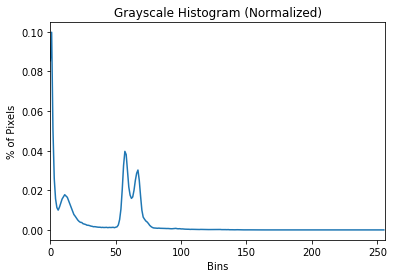

In [359]:
# plot the normalized histogram
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [360]:
def Histogram_Equalize(img1,hist):
    cum_hist_sum = np.zeros((256,1))
    cum_hist_sum[0] = hist[0]
    for i in range(1,256):
        cum_hist_sum[i] = cum_hist_sum[i-1] + hist[i]
   
    row = img1.shape[0]
    col = img1.shape[1]
    total = row*col
    val = 1/256
    #print(val)
   #equalized histogram image will have frequency val for each intensity
    cum_hist_Eq = np.zeros((256,1))
    cum_hist_Eq[0] = val
    for i in range(256):
        cum_hist_Eq[i] = cum_hist_Eq[i-1] + val

    Mapping = np.zeros((256,1))
    for i in range(256):
        for j in range(256):
            if (cum_hist_sum[i] == cum_hist_Eq[j]) or (cum_hist_sum[i] < cum_hist_Eq[j]):
                break
        Mapping[i] = j #Need to replace ith intensity of original image with jth intensity
    
    Equalized_image = np.zeros((row,col))
    for i in range(row):
        for j in range(col):
            Equalized_image[i,j] = img1[i,j] 
    for i in range(row):
        for j in range(col):
            v = img1[i,j]
            Equalized_image[i,j] = Mapping[v]
    return Equalized_image 

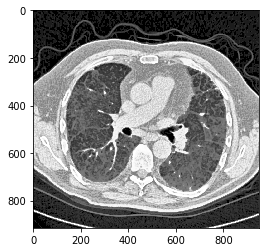

In [361]:
#*******Calling the method histogram Equalization********
Equalized_image1 = Histogram_Equalize(img_filter1,hist)
plt.imshow(Equalized_image1,cmap = 'gray')

In [362]:
hist2 = cv2.calcHist([img_filter2],[0],None,[256],[0,255])

(0, 256)

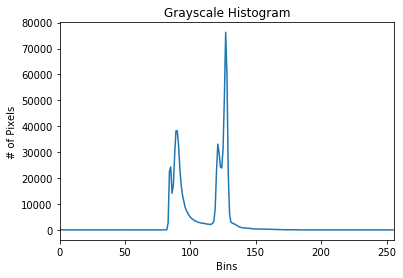

In [363]:
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist2)
plt.xlim([0, 256])

In [364]:
# normalize the histogram
hist2 /= hist2.sum()

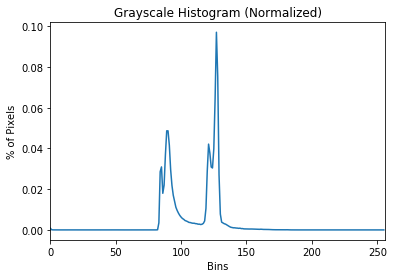

In [365]:
# plot the normalized histogram
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist2)
plt.xlim([0, 256])
plt.show()

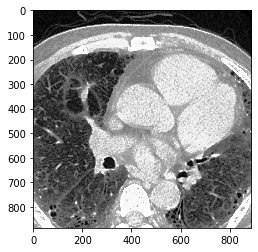

In [366]:
#*******Calling the method histogram Equalization********
Equalized_image2 = Histogram_Equalize(img_filter2,hist2)
plt.imshow(Equalized_image2,cmap = 'gray')

In [367]:

clahe = cv2.createCLAHE(clipLimit = 2)
final_img1 = clahe.apply(img_filter1)

clahe = cv2.createCLAHE(clipLimit = 3)
final_img2 = clahe.apply(img_filter2)

Text(0.5, 1.0, 'Contrast Enhanced image2')

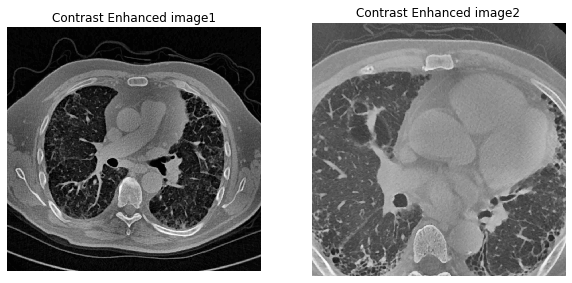

In [368]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(final_img1,cmap = cm.gray)
plt.axis('off')
plt.title("Contrast Enhanced image1")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(final_img2,cmap = cm.gray)
plt.axis('off')
plt.title("Contrast Enhanced image2")

(0, 256)

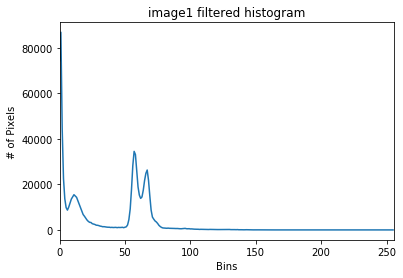

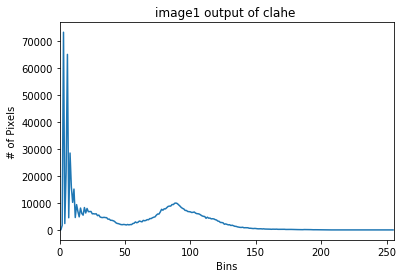

In [369]:
hist_filtered = cv2.calcHist([img_filter1],[0],None,[256],[0,255])
hist_final_img1 = cv2.calcHist([final_img1],[0],None,[256],[0,255])
# plot the histogram
plt.figure()
plt.title("image1 filtered histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_filtered)
plt.xlim([0, 256])

# plot the histogram
plt.figure()
plt.title("image1 output of clahe ")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_final_img1)
plt.xlim([0, 256])

(0, 256)

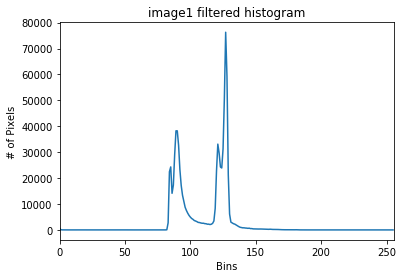

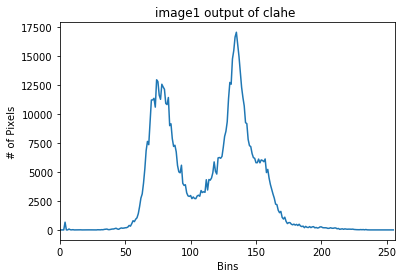

In [370]:
hist_filtered2 = cv2.calcHist([img_filter2],[0],None,[256],[0,255])
hist_final_img2 = cv2.calcHist([final_img2],[0],None,[256],[0,255])
# plot the histogram
plt.figure()
plt.title("image1 filtered histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_filtered2)
plt.xlim([0, 256])

# plot the histogram
plt.figure()
plt.title("image1 output of clahe ")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_final_img2)
plt.xlim([0, 256])

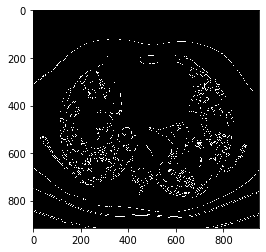

In [371]:
#******Canny Edge Detector on final image1********#
wide1 = cv2.Canny(final_img1,30,250)
plt.imshow(wide1,cmap = cm.gray)

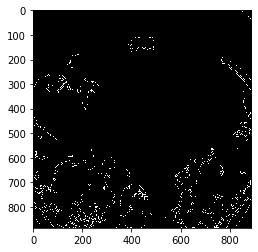

In [372]:
#******Canny Edge Detector on final image2********#
wide2 = cv2.Canny(final_img2,30,250)
plt.imshow(wide2,cmap = cm.gray)

In [373]:
# Sobel Edge Detection on image1

sobelx = cv2.Sobel(src=final_img1, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=final_img1, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=final_img1, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) #

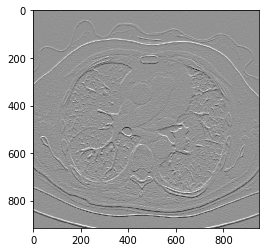

In [374]:
plt.imshow(sobelx,cmap = 'gray')

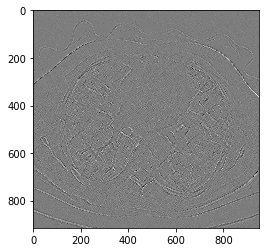

In [375]:
plt.imshow(sobelxy,cmap = 'gray')

In [376]:
# Sobel Edge Detection on final image2

sobelx2 = cv2.Sobel(src=final_img2, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the X axis
sobely2 = cv2.Sobel(src=final_img2, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy2 = cv2.Sobel(src=final_img2, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) #

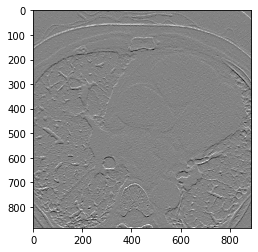

In [377]:
plt.imshow(sobelx2,cmap = 'gray')

# Part3 : Hough Transform

In [378]:
print(final_img1.shape)

(915, 951)


(150, 200)


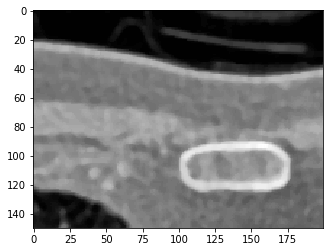

In [379]:
crop_img1 = final_img1[100:250, 350:550]
print(crop_img1.shape)
plt.imshow(crop_img1,cmap = 'gray')

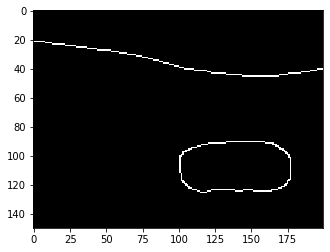

In [380]:
crop_wide1 = wide1[100:250,350:550]
plt.imshow(crop_wide1,cmap = 'gray')

In [251]:
#2d accumulator array to store rho and theta
arr = np.zeros((150,200))
row = crop_wide1.shape[0]
col = crop_wide1.shape[1]
print(row,col)
for i in range(row):
    for j in range(col):
        if crop_wide1[i,j] == 255:            
            #print(i,j)
            for t in range(180):
                rho = (i*math.cos(t/math.pi)) + (j*math.sin(t/math.pi))
                if rho.is_integer():
                    k = int(rho)
                    arr[k,t] = arr[k,t] + 1


150 200


In [252]:
max1 = 0
max2 = 0
max1_coord,max2_coord = [0,0],[0,0]
for i in range(150):
    for j in range(200):
        if arr[i,j] > max1:
            max1 = arr[i,j]
            max1_coord = [i,j]
        elif arr[i,j] > max2:
            max2 = arr[i,j]
            max2_coord = [i,j]
print(max1,max2) 
print(max2_coord)

31.0 24.0
[124, 0]


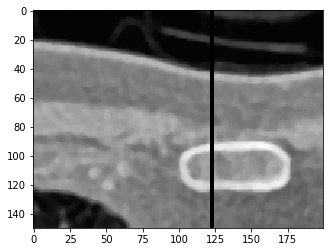

In [256]:
#Drawing Line on original image
a = np.cos(max1_coord[1])
b = np.sin(max1_coord[1])
x0 = a*max1_coord[0]
y0 = b*max1_coord[0]
x1 = int(x0 + 1000*(-b))
y1 = int(y0 + 1000*(a))
x2 = int(x0 - 1000*(-b))
y2 = int(y0 - 1000*(a))
cv2.line(crop_img1,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(crop_img1,cmap = 'gray')

# Ellipse detection using hough transform

In [402]:
def ellipse_detect(img):
   # Window name in which image is displayed
    window_name = 'Image'
   # axes length a between 50 to 65 and axes length b will try between 20 to 40 
   #axesLength = (60, 25) 
    angle = 0
    startAngle = 0
    endAngle = 360
   
   # Red color in BGR
    color = (0, 0, 255)
   
   # Line thickness of 5 px
    thickness = 5
    h,k = 500, 200 #Will work with this centre coordinates
    centre_coordinates = [h,k]
    accumulator_ellipse = np.zeros((100,1000))
    row = img.shape[0]
    col = img.shape[1]
    arr1 = np.zeros((row*col + 1,1))
    for i in range(row):
        for j in range(col):
            if img[i,j] == 255:
               #Will take various centers and predict radius
               for a in range(1,65):
                    val = (1 - ((i)**2)/(a**2))
                    if val != 0:
                        b_val = ((j)**2)/val
                        if b_val >0:
                            b = math.sqrt(b_val)
                            b = int(b)
                            accumulator_ellipse[a,b] = accumulator_ellipse[a,b] + 1
                
                
    print(np.max(accumulator_ellipse))
    center_coordinates = (500,200)
    max1,max2 = 0,0
    max1_coord = [0,0]
    max2_coord = [0,0]
    for i in range(accumulator_ellipse.shape[0]):
        for j in range(accumulator_ellipse.shape[1]):
            if accumulator_ellipse[i,j] > max1:
                max1 = accumulator_ellipse[i,j]
                max1_coord = [i,j]
            elif accumulator_ellipse[i,j]>max2:
                max2 = accumulator_ellipse[i,j]
                max2_coord = [i,j]
    print(max1_coord,max2_coord)
    axesLength = (max1_coord[1],max1_coord[0])
    return axesLength

6.0
[55, 288] [53, 306]


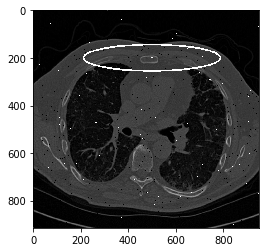

In [403]:
axesLength = ellipse_detect(crop_wide1)
image = cv2.ellipse(img1, center_coordinates, axesLength,angle, startAngle, endAngle, 255, 5)
# Displaying the image 
plt.imshow(image,cmap = 'gray') 

12.0
[64, 52] [62, 52]


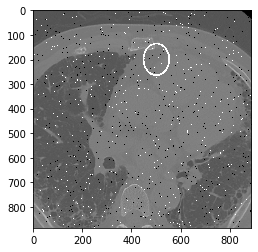

In [404]:
axesLength = ellipse_detect(crop_wide2)
image = cv2.ellipse(img2, center_coordinates, axesLength,angle, startAngle, endAngle, 255, 5)
# Displaying the image 
plt.imshow(image,cmap = 'gray') 

# Lamet curve detection using Hough transform
#Still Work in progress

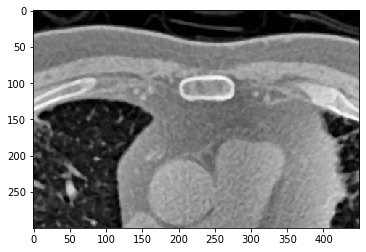

In [519]:
cropped_wide1=wide1[100:250,350:550]
Cropped_img_filter1=final_img1[100:400,250:700]
cropped_wide2=wide2[110:400,250:700]
Cropped_img_filter2=final_img2[100:400,250:700]
plt.imshow(Cropped_img_filter1,cmap = 'gray')

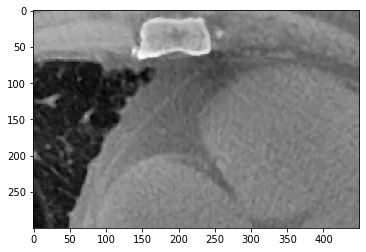

In [520]:
plt.imshow(Cropped_img_filter2,cmap = 'gray')

In [538]:
import math
def lamet_curve_detect(img, min2a):
    
    width,height= img.shape;
    print(width,height)
    #Selecting non zero pixels from image
    indices_list = np.where(img!=0)
    print(np.shape(indices_list))
    a_range=range(-width,width)
    b_range=range(-height,height)
     
    accumulator_lamet = np.zeros((2*width,2*height));
    for ij1 in range(0,np.shape(indices_list)[1]-1) :
        for ij2 in range(np.shape(indices_list)[1]-1,(ij1),-1):
            x1 = indices_list[0][ij1];
            y1 = indices_list[1][ij1];
            
            x2 = indices_list[0][ij2];
            
            y2 = indices_list[1][ij2];     
#A = t
#B = (t^m.y^m)/t^m - X^m
#The Hough transform has an horizontal asymptote of equation B = y_p^4 and vertical one of equation A = x_p

            for i in range( 0,width-1):
                for j in range( 0,height-1):
                    if(img[i,j]!=0):  
                        for t1 in range(0,2*width,1):
                            t=a_range[t1]
                            A=t;
                            if (((t**4)-(i**4))==0):
                                continue;
                            B=(t**4)*(j**4)/((t**4)-(i**4))
                            b = (np.floor(abs(B**0.25)))+height;
                            
                            if ( b<2*height):
                                    accumulator_lamet[t1][int(b)]=accumulator_lamet[t1][int(b)]+1;
            #Finding center of the curve
            dist_pixels12 = np.sqrt((x1-x2)**2+(y1-y2)**2)   
            if dist_pixels12 > min2a:
                # Center
                x0 = (x1 + x2)/2;
                y0 = (y1 + y2)/2;
               
            max1 = 0
           
           #Getting the maximum Vote
            for i in range(accumulator_lamet.shape[0]):
                for j in range(accumulator_lamet.shape[1]):
                    if accumulator_lamet[i,j] > max1:
                        max1 = accumulator_lamet[i,j]
                
            m,n=np.where(accumulator_lamet==max1)
            parameters = [x0,y0,a_range[int(n)],b_range[int(m)]/2];
            return parameters

In [539]:
parameter1 = lamet_curve_detect(cropped_wide1, min2a = 25)

150 200
(2, 411)


In [540]:
parameter2 = lamet_curve_detect(cropped_wide2, min2a = 30)

290 450
(2, 485)


In [541]:
from math import sin, cos, pi   
def sgn(x):
    return ((x>0)-(x<0))*1

In [542]:
# The curve is given by the parametric equations having no elementary geometric interpretation
# x(t) = +-a*cos^(2/n)t
#y(t) = +-b*sin^(2/n)t

def plotCurve(img,a,b,x0,y0):
      
    
    n=4
    na = 2 / n
    
    iterations = 200 
    piece =(pi * 2)/iterations
    xp =[];yp =[]
       
    t = 0
    for t1 in range(iterations + 1):
        
        x =(abs((cos(t)))**na)*a * sgn(cos(t))+x0
        y =(abs((sin(t)))**na)*b * sgn(sin(t))+y0
        xp.append(x)
        yp.append(y)
        t+= piece
        
    fig, ax = plt.subplots()
    im = ax.imshow(img,'gray')

    ax.plot(xp,yp, ls='dotted', linewidth=5, color='blue')
    plt.show()  



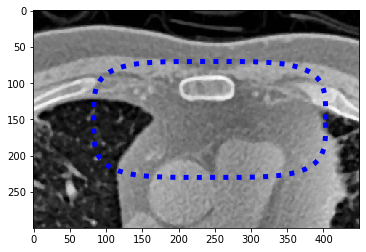

In [543]:
plotCurve(Cropped_img_filter1,para1[2],para1[3],para1[1],para1[0])

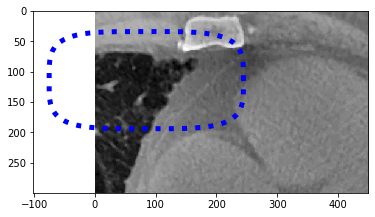

In [544]:
plotCurve(Cropped_img_filter2,para2[2],para2[3],para2[1],para2[0])